# Sentiment Analysis
## Background Reading:

*Intro to Statistical Learning*: 10.4 Document Classification, 10.5 Recurrent Neural Network (Page 419-431)

*Ethical Algorithm*: Chapter 5, Risky Business (Page 178-188)

## Essence of Data

In [1]:
#install transformers
!pip install  transformers 

#install umap
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 163 kB 39.4 MB/s 
     |████████████████████████████████| 6.6 MB 45.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2bc830317276fa885125ed6a0e0e5334bf48de488b0227df41b978d38528debe
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=2f932ff6ef6e42ecf91061614ac3e070e345da44915cbcac41486a7487040642
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db311351369

In [2]:
!git clone https://github.com/zlisto/sentiment_analysis

Cloning into 'sentiment_analysis'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 65 (delta 27), reused 47 (delta 14), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [3]:


import os
os.chdir("sentiment_analysis")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codecs
import umap
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"device ={device}")

device =cpu


In [5]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [6]:
def sentiment_classifier(text,model,tokenizer):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)

    token_type_ids = inputs['token_type_ids']
    input_ids = inputs['input_ids']

    output = model(input_ids, token_type_ids=token_type_ids,return_dict=True,output_hidden_states=True)
    logits = np.array(output.logits.tolist()[0])
    prob = np.exp(logits)/np.sum(np.exp(logits))
    sentiment = np.sum([(x+1)*prob[x] for x in range(len(prob))])  #use this line if you want the mean score
    embedding = output.hidden_states[12].detach().numpy().squeeze()[0]
    
    return sentiment, embedding


In [ ]:
Text = ["This class is kinda boring, but informative", 
        "This class is awesome", 
        "this class is ok", 
        "this class is stupid",
        "this class is fun",
       "this class is fun!",
       "this class is :(",
       "this class is :)",
]

In [ ]:
for text in Text:
    sentiment,embedding = sentiment_classifier(text,model,tokenizer)
    print(f"Text: {text}\nSentiment:{sentiment:.2f}\n")

Text: This class is kinda boring, but informative
Sentiment:3.12

Text: This class is awesome
Sentiment:4.84

Text: this class is ok
Sentiment:3.27

Text: this class is stupid
Sentiment:1.24

Text: this class is fun
Sentiment:4.26

Text: this class is fun!
Sentiment:4.44

Text: this class is :(
Sentiment:3.57

Text: this class is :)
Sentiment:4.29



In [ ]:
df = pd.read_csv("data/tweets_sentiment_embedding.csv")

df = df[['screen_name','text','retweet_count']]
ntweets = len(df)
print(f"dataframe has {ntweets} tweets\n")
[print(f"Tweets from {x}") for x in df.screen_name.unique()];


dataframe has 29056 tweets

Tweets from elonmusk
Tweets from MichelleObama
Tweets from BarackObama
Tweets from AOC
Tweets from KingJames
Tweets from KimKardashian
Tweets from mtgreenee
Tweets from nytimes
Tweets from kanyewest
Tweets from JoeBiden


In [ ]:
%%time
c = 0
Sentiment = []
Embedding = []
for index,row in df.iterrows():
    c+=1
    if c%1000==0:print(f"Tweet {c}/{len(df)}")
    sentiment,embedding = sentiment_classifier(row.text,model,tokenizer)
    Sentiment.append(sentiment)
    Embedding.append(embedding)

df['sentiment'] = Sentiment
df.to_csv("data/tweets_sentiment.csv")
df.head()
    

Tweet 1000/29056
Tweet 2000/29056
Tweet 3000/29056
Tweet 4000/29056
Tweet 5000/29056
Tweet 6000/29056
Tweet 7000/29056
Tweet 8000/29056
Tweet 9000/29056
Tweet 10000/29056
Tweet 11000/29056
Tweet 12000/29056
Tweet 13000/29056
Tweet 14000/29056
Tweet 15000/29056
Tweet 16000/29056
Tweet 17000/29056
Tweet 18000/29056
Tweet 19000/29056


In [ ]:
df = pd.read_csv("data/tweets_sentiment_embedding.csv")

print(f"dataframe has {len(df)} tweets")
[print(f"Tweets from {x}") for x in df.screen_name.unique()];
df.sample(n=5)

In [ ]:
fig = plt.figure(figsize = (16,6))
sns.barplot(data = df, y= 'sentiment', x = 'screen_name' )
plt.ylim([2,4])
plt.ylabel("Mean sentiment",fontsize = 16)
plt.grid()
plt.ylim([0,5]);
plt.show()

In [ ]:
for screen_name in df.screen_name.unique():
  sns.histplot(data = df[df.screen_name==screen_name], x = 'sentiment')
  plt.title(f"Tweets of {screen_name}", fontsize = 14)
  plt.show()

In [ ]:
ndisplay = 3
print(f"Top {ndisplay} most postive tweets per screen name")
for screen_name in df.screen_name.unique():
    df_display = df[(df.screen_name==screen_name)].sort_values(by = ['sentiment'], 
                                                               ascending = False)
    c=0
    print(f"\n{screen_name}")
    for index,row in df_display.iterrows():
        c+=1
        text = codecs.decode(row.text, 'unicode_escape')
        print(f"\tsentiment = {row.sentiment:.2f}: {text}")
        if c>=ndisplay:break

print("".join('-' * 200))

print(f"Top {ndisplay} Most Negative Tweets per Screen Name")
for screen_name in df.screen_name.unique():
    df_display = df[(df.screen_name==screen_name)].sort_values(by = ['sentiment'], ascending = True)
    c=0
    print(f"\n{screen_name}")
    for index,row in df_display.iterrows():
        c+=1
        text = codecs.decode(row.text, 'unicode_escape')
        print(f"\tsentiment = {row.sentiment:.2f}: {text}")
        if c>=ndisplay:break



In [ ]:
df['star'] = df.sentiment.round()

fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df, x="star", y="retweet_count")
ymax = df.retweet_count.quantile(0.95)
plt.ylim([0,ymax])
plt.xlabel("Sentiment", fontsize = 16)
plt.ylabel("Retweet Count", fontsize = 16)
plt.grid()
plt.show()

In [ ]:
for screen_name in df.screen_name.unique():
    fig = plt.figure(figsize = (12,8))
    df_plot = df[df.screen_name==screen_name]
    ax = sns.boxplot(data=df_plot, x="star", y="retweet_count")
    ymax = df_plot.retweet_count.quantile(q=0.9)
    plt.ylim([0,ymax])
    plt.xlabel("Sentiment", fontsize = 16)
    plt.ylabel("Retweet Count", fontsize = 16)
    plt.title(f"{screen_name}", fontsize = 16)
    plt.grid()
    plt.show()

In [ ]:
for screen_name in df.screen_name.unique():
  fig = plt.figure(figsize = (8,8))
  sns.scatterplot(data=df[df.screen_name == screen_name], 
                  x="umap_transformer_x", 
                  y="umap_transformer_y", 
                  hue="sentiment", 
                  palette="vlag", s=15)
  plt.title(f"UMAP Transformer Embedding for {screen_name}")
  plt.show()


## AI in fabrics of society:
### Turing Test
Can Machines Think like human?

Artificial Intellegence is developing by leaps and bounds, which enables robots to drive the car, transfer the language and predict the future (though not accurate). But can AI think like people? Sometimes when AIs are chatting like a people like what I experienced years ago when I was chatting with Bing (AI of Bing Research Engine):

![](./fig/sentiment/fig1.jpg)
![](./fig/sentiment/fig2.jpg)
![](./fig/sentiment/fig3.jpg)

You may saw some alluring movies with the topic that AI threats human and replace us, becoming the owner of the world. Indeed, such concerns are not surprising in today's era of rapid development of artificial intelligence, which has replaced many jobs, significantly improving efficiency, but there are also potential dangers such as job losses. Consequently, whether AI can replace human beings is a topic that scientists focus on.

This question confused us since AI occured. Alan Turing, a British mathematician and computer pioneer, gradually developed the basic concepts of computer science during his research on how to break German telegraph codes during World War II, and devoted himself to researching artificial intelligence after the war. In his 1950 paper Computing Machinery and Intelligence, he proposed the famous **Turing Test**, which checks whether a machine can display human intelligence by having it talk to a human, and if the human doesn't find out it's a machine, it's a success.

Specifically, the Turing Test is conducted in a room where human judges talk to a real person they cannot see and to a machine, and determine which is a human and which is a machine based on the quality of the conversation. Now the Turing test conversation is usually 5 minutes long, if more than 30% of the judges treat the computer as a human, then the computer is successful. Turing had predicted that a machine would pass the Turing test in 2000 AD. As a result, an AI really passed, only 10 years later.

Wiki: https://en.m.wikipedia.org/wiki/Turing_test

Some competitions including **Loebner Prize** are held to find the most "human" computer/human. AI now becomes more similar to human beings, the competition aims at finding the most human-like one and the development level of AI.

Wiki: https://en.wikipedia.org/wiki/Loebner_Prize

#Sentiment Analysis on Public Domain Novels## 

In this section, I will be doing sentiment analysis on five books publically available from Project Gutenberg: https://www.gutenberg.org/

First, I import the relevant libraries needed to scrape and analyze the text. Then, for each book I want, I use the requests library to pull the full text from the link. Only the number in the link changes between books; the format stays the same otherwise. (Links were found via Google because Project Gutenberg has specific rules about bots accessing their page and will ban you if you break them!). 

I used the sentence tokenizer from the nltk (natural language toolkit) library to split the text into sentences. It has varying levels of success. Then, I used the sentiment classifier from above to get the sentiment of each sentence. It's important to note that there are many non-sentence sentences, such as chapter titles, or the text introducing the book. 

I included code to write each book to a csv file and to read them back in, so that the sentiment classifier doesn't need to be run each time you want to look at the data (it is slow). In a Jupyter Notebook, you can just use pd.read_csv('path\to\file.csv'), but because I was writing this in Google Colab, I had to do things a little bit differently.

Because of encoding issues that occurred when pulling the text from gutenberg.org, I went into each csv and used find and replace to fix the special characters. I think this could have been done in the code using a different encoder (e.g 'latin-1' vs 'utf-8').

After collecting all the data, I analyzed it to compare the sentiments of the five novels and how much I liked each of them. 


In [ ]:
from http import HTTPStatus
import requests
import nltk
nltk.download('punkt')
from nltk.tokenize import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#set url of the book in project gutenberg
url = "https://www.gutenberg.org/cache/epub/25344/pg25344.txt"
response = requests.get(url)
assert response.status_code == HTTPStatus.OK
#pull the text from the site
source = response.text
#break text into sentences
tokenized_text=sent_tokenize(source)
i=0
#make a df with each sentence and its sentiment score
Scarlet_df=pd.DataFrame(columns=['Text','Sentiment'])
for sentence in tokenized_text:
  Scarlet_df.loc[i,'Text']=sentence
  if len(sentence)>512:
    Scarlet_df.loc[i,'Sentiment']=sentiment_classifier(sentence[0:511],model,tokenizer)[0]
  else:
   Scarlet_df.loc[i,'Sentiment']=sentiment_classifier(sentence,model,tokenizer)[0]
  if i%200==0:
    print(i)
  i=i+1
Scarlet_df.to_csv('Scarlet.csv')

In [ ]:
#this block takes ~25 minutes to run because the book is so long
url = "https://www.gutenberg.org/cache/epub/98/pg98.txt"
response = requests.get(url)
assert response.status_code == HTTPStatus.OK
source = response.text
tokenized_text=sent_tokenize(source)
i=0
TwoCities_df=pd.DataFrame(columns=['Text','Sentiment'])
for sentence in tokenized_text:
  TwoCities_df.loc[i,'Text']=sentence
  if len(sentence)>512:
    TwoCities_df.loc[i,'Sentiment']=sentiment_classifier(sentence[0:511],model,tokenizer)[0]
  else:
   TwoCities_df.loc[i,'Sentiment']=sentiment_classifier(sentence,model,tokenizer)[0]
  if i%200==0:
    print(i)
  i=i+1
TwoCities_df.to_csv('TwoCities.csv')

In [ ]:
url = "https://www.gutenberg.org/cache/epub/64317/pg64317.txt"
response = requests.get(url)
assert response.status_code == HTTPStatus.OK
source = response.text
tokenized_text=sent_tokenize(source)
i=0
Gatsby_df=pd.DataFrame(columns=['Text','Sentiment'])
for sentence in tokenized_text:
  Gatsby_df.loc[i,'Text']=sentence
  if len(sentence)>512:
    Gatsby_df.loc[i,'Sentiment']=sentiment_classifier(sentence[0:511],model,tokenizer)[0]
  else:
   Gatsby_df.loc[i,'Sentiment']=sentiment_classifier(sentence,model,tokenizer)[0]
  if i%200==0:
    print(i)
  i=i+1
Gatsby_df.to_csv('Gatsby.csv')

In [ ]:
url = "https://www.gutenberg.org/cache/epub/174/pg174.txt"
response = requests.get(url)
assert response.status_code == HTTPStatus.OK
source = response.text
tokenized_text=sent_tokenize(source)
i=0
Dorian_df=pd.DataFrame(columns=['Text','Sentiment'])
for sentence in tokenized_text:
  Dorian_df.loc[i,'Text']=sentence
  if len(sentence)>512:
    Dorian_df.loc[i,'Sentiment']=sentiment_classifier(sentence[0:511],model,tokenizer)[0]
  else:
   Dorian_df.loc[i,'Sentiment']=sentiment_classifier(sentence,model,tokenizer)[0]
  if i%200==0:
    print(i)
  i=i+1
Dorian_df.to_csv('Dorian.csv')

In [ ]:
url = "https://www.gutenberg.org/cache/epub/42324/pg42324.txt"
response = requests.get(url)
assert response.status_code == HTTPStatus.OK
source = response.text
tokenized_text=sent_tokenize(source)
i=0
Frankenstein_df=pd.DataFrame(columns=['Text','Sentiment'])
for sentence in tokenized_text:
  Frankenstein_df.loc[i,'Text']=sentence
  Frankenstein_df.loc[i,'Sentiment']=sentiment_classifier(sentence,model,tokenizer)[0]
  if i%200==0:
    print(i)
  i=i+1
Frankenstein_df.to_csv('Frankenstein.csv')

In [9]:
#run this part if you need to read csv files into colab from your drive (mounts to drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#only run this part if you already created the csvs and stored them elsewhere
df_Frankenstein = pd.read_csv('/content/drive/MyDrive/Data/Frankenstein.csv')
df_Gatsby=pd.read_csv('/content/drive/MyDrive/Data/Gatsby.csv',encoding='latin-1')
df_TwoCities=pd.read_csv('/content/drive/MyDrive/Data/TwoCities.csv')
df_Scarlet=pd.read_csv('/content/drive/MyDrive/Data/Scarlet.csv',encoding='latin-1')
df_Dorian=pd.read_csv('/content/drive/MyDrive/Data/Dorian.csv',encoding='latin-1')

In [37]:
print(df_Frankenstein['Sentiment'].median())
print(df_Dorian['Sentiment'].median())
print(df_Scarlet['Sentiment'].median())
print(df_Gatsby['Sentiment'].median())
print(df_TwoCities['Sentiment'].median())
median_vals=[df['Sentiment'].median() for df in [df_TwoCities,df_Gatsby,df_Scarlet,df_Dorian,df_Frankenstein]]

2.984138690225352
2.796345243
2.961320363
2.7663591715
2.7617838514999997


In the below plot, I ordered the books from my least to most favorite. The coloring has such drastic changes because three of the books have an average sentiment around 2.77, then the remaining two are around 2.97. The color differences reflect this jump. In general, the books I liked more tended to have a slightly higher average sentiment.

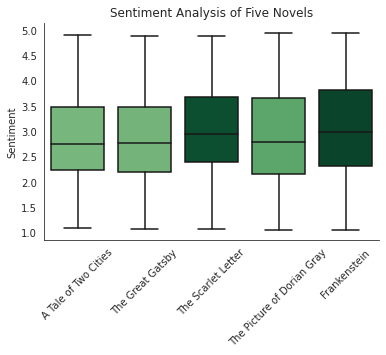

In [43]:
combined_dfs = pd.DataFrame({'A Tale of Two Cities': df_TwoCities['Sentiment'],
                             'The Great Gatsby': df_Gatsby['Sentiment'],
                             'The Scarlet Letter': df_Scarlet['Sentiment'],
                             'The Picture of Dorian Gray': df_Dorian['Sentiment'],
                             'Frankenstein': df_Frankenstein['Sentiment']})
sns.set_style('white')
# norm = plt.Normalize(min(median_vals), max(median_vals))
norm = plt.Normalize(2.5, 3)
colors = plt.cm.YlGn(norm(median_vals))
sns.boxplot(data=combined_dfs, palette=colors)
sns.despine()
plt.xticks(rotation=45)
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Five Novels')
plt.show()